# Digit Recognition using Mnist Data

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA

## Data Preparation

### Loading dataset

In [2]:
mnist = fetch_openml('mnist_784',version=1)

In [3]:
X = mnist.data / 255.0
y = mnist.target.astype(int)

### Preprocessing the images / Flattening

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model

### Development

In [6]:
model = GaussianNB()

### Training and testing

In [7]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### Evaluation

In [8]:
print("Clssification Report\n")
classification_report(y_test,y_pred)

Clssification Report



'              precision    recall  f1-score   support\n\n           0       0.69      0.91      0.78      1343\n           1       0.81      0.95      0.88      1600\n           2       0.85      0.30      0.44      1380\n           3       0.74      0.32      0.45      1433\n           4       0.83      0.13      0.23      1295\n           5       0.61      0.04      0.08      1273\n           6       0.64      0.94      0.76      1396\n           7       0.91      0.28      0.42      1503\n           8       0.29      0.60      0.39      1357\n           9       0.37      0.94      0.53      1420\n\n    accuracy                           0.55     14000\n   macro avg       0.67      0.54      0.50     14000\nweighted avg       0.68      0.55      0.51     14000\n'

In [9]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred)

Confusion Matrix


array([[1218,    2,    9,    2,    4,    2,   52,    2,   32,   20],
       [   2, 1520,    3,    5,    0,    4,   15,    1,   39,   11],
       [ 142,   40,  408,  102,    5,    5,  331,    0,  327,   20],
       [ 118,   66,   12,  462,    2,    8,   90,    9,  496,  170],
       [  51,    7,   15,    6,  170,    7,  146,    5,  278,  610],
       [ 183,   31,   10,   18,    4,   56,   77,    3,  757,  134],
       [  16,   25,    6,    0,    2,    4, 1316,    0,   24,    3],
       [   8,   10,    3,   16,    8,    3,    1,  417,   50,  987],
       [  28,  160,    5,    9,    3,    3,   30,    3,  816,  300],
       [   9,    8,    7,    4,    8,    0,    1,   20,   24, 1339]],
      dtype=int64)

## Visualization

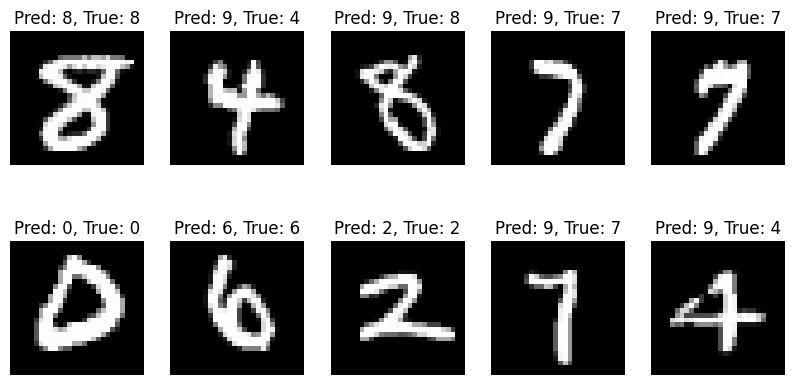

In [17]:
fig,axes = plt.subplots(2,5,figsize=(10,5))
for i,ax in enumerate(axes.flat):
    img = X_test.iloc[i].values.reshape(28,28)
    ax.imshow(img,cmap='gray')
    ax.set_title(f'Pred: {y_pred[i]}, True: {y_test.iloc[i]}')
    ax.axis('off')
plt.show()

## PCA Visualization

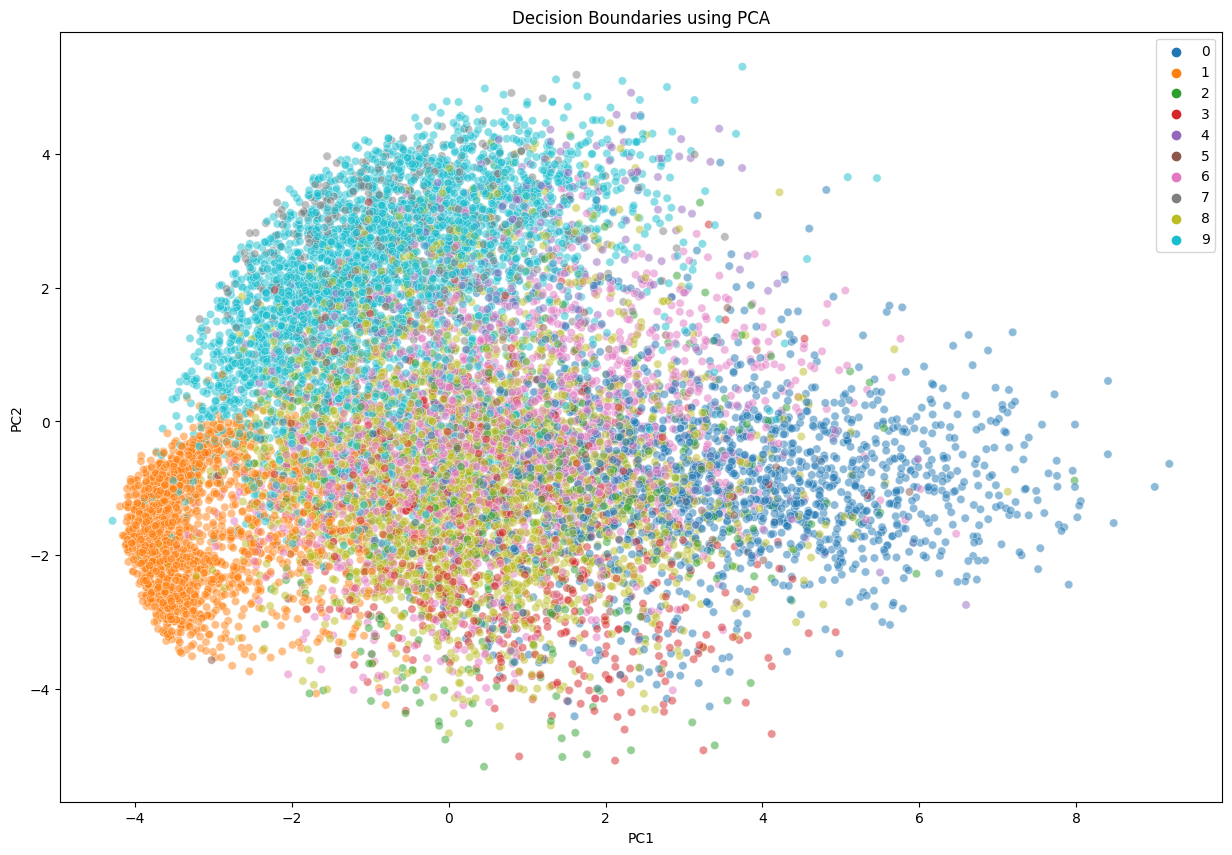

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plt.figure(figsize=(15,10))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y_pred,palette='tab10',alpha=0.5)
plt.title("Decision Boundaries using PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()